In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import *

# First we want to clean up our data -- we only want U.S. data by state
mobility = pd.read_csv('Global_Mobility_Report.csv')
state_sheet = pd.read_csv('COVID19_cases_by_state.csv')

US_mob = mobility[mobility.country_region == 'United States']

# Now we can find the average mobility rate per activity per state

def state_avg(df):
    """We want to find the average mobility rate for each category (i.e.
        park, pharamacy, etc.) for each state.
    """
    
    
    # Finding the average mobility % -- note that the % is measured from the 
    
    retail_avg = df.groupby('sub_region_1')['retail_and_recreation_percent_change_from_baseline'].mean()
    
    grocery_pharm_avg = df.groupby('sub_region_1')['grocery_and_pharmacy_percent_change_from_baseline'].mean()
    
    park_avg = df.groupby('sub_region_1')['parks_percent_change_from_baseline'].mean()
    
    transit_avg = df.groupby('sub_region_1')['transit_stations_percent_change_from_baseline'].mean()
    
    work_avg = df.groupby('sub_region_1')['workplaces_percent_change_from_baseline'].mean()
    
    home_avg = df.groupby('sub_region_1')['residential_percent_change_from_baseline'].mean()
    
    
    
    # Now we can organize this data into a new table 
    
    state_avgs = pd.DataFrame({'Mean Retail %':retail_avg,
                               'Mean Grocery&Pharm %': grocery_pharm_avg,
                               'Mean Park %': park_avg,
                               'Mean Transit %': transit_avg,
                               'Mean Work %': work_avg,
                               'Mean Home %': home_avg})
    
    return state_avgs


C:\Users\mavis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


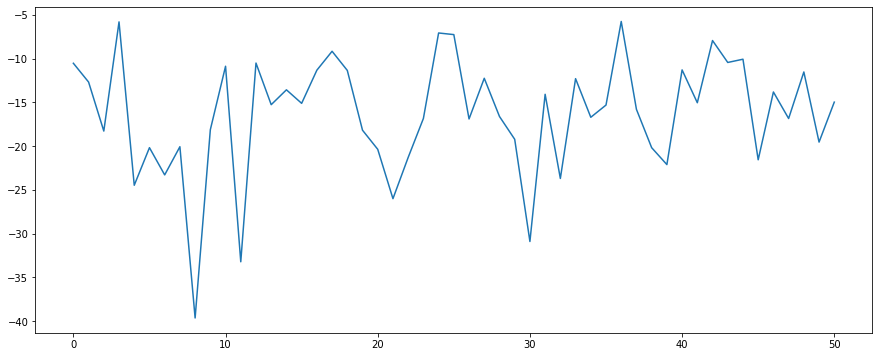

In [102]:
# Making a new table with the average mobility for each state
state_data = state_avg(US_mob)

# Now converting each mobility category into lists ordered by state
retailL = state_data['Mean Retail %'].tolist()
grocPharmL = state_data['Mean Grocery&Pharm %'].tolist()
parkL = state_data['Mean Park %'].tolist()
transitL = state_data['Mean Transit %'].tolist()
workL = state_data['Mean Work %'].tolist()
homeL = state_data['Mean Home %'].tolist()

# Also making a state list:
states = US_mob['sub_region_1'].tolist()
#print(state_data)

# And making a date list:
dates = US_mob['date'].tolist()

plt.figure(figsize = (15,6))
plt.plot(retailL)
#plt.plot(state_data['Mean Grocery&Pharm %'])
#plt.plot(state_data['Mean Park %'])
#plt.plot(state_data['Mean Transit %'])
#plt.plot(state_data['Mean Work %'])
#plt.plot(state_data['Mean Home %'])

plt.show()

In [104]:
print(state_data)

                      Mean Retail %  Mean Grocery&Pharm %  Mean Park %  \
sub_region_1                                                             
Alabama                  -10.541007              3.036910    13.660526   
Alaska                   -12.687609             -3.627490    27.528736   
Arizona                  -18.285493             -2.363705    -4.033613   
Arkansas                  -5.814293              5.091193    29.806020   
California               -24.475285             -3.831489    -6.391938   
Colorado                 -20.183183             -5.131884     1.084979   
Connecticut              -23.292810             -7.048366    22.386431   
Delaware                 -20.073529             -8.705882    10.677524   
District of Columbia     -39.635294            -18.129412   -33.188235   
Florida                  -18.130162             -3.842572   -14.942795   
Georgia                  -10.881639              1.759138     4.022062   
Hawaii                   -33.216471   

In [110]:
# These are the maximum infection rates for each state (as taken from uscovid.ipynb file)
max_rates = {'AL': ('20200408', 400.0),
             'AK': ('20200406', 22.0),
             'AZ': ('20200429', 446.0),
             'AR': ('20200420', 304.0),
             'CA': ('20200429', 2417.0),
             'CO': ('20200424', 994.0),
             'CT': ('20200419', 2265.0),
             'DE': ('20200425', 458.0),
             'DC': ('20200430', 335.0),
             'FL': ('20200402', 1575.0),
             'GA': ('20200416', 1525.0),
             'HI': ('20200401', 50.0),
             'ID': ('20200402', 222.0),
             'IL': ('20200430', 3137.0),
             'IN': ('20200426', 949.0),
             'IA': ('20200501', 757.0),
             'KS': ('20200429', 500.0),
             'KY': ('20200409', 347.0),
             'LA': ('20200401', 2726.0),
             'ME': ('20200412', 65.0),
             'MD': ('20200430', 1730.0),
             'MA': ('20200422', 3079.0),
             'MI': ('20200413', 1366.0),
             'MN': ('20200504', 617.0),
             'MS': ('20200430', 397.0),
             'MO': ('20200503', 368.0),
             'MT': ('20200326', 37.0),
             'NE': ('20200503', 584.0),
             'NV': ('20200329', 270.0),
             'NH': ('20200501', 164.0),
             'NJ': ('20200402', 4305.0),
             'NM': ('20200429', 239.0),
             'NY': ('20200414', 11571.0),
             'NC': ('20200501', 586.0),
             'ND': ('20200417', 89.0),
             'OH': ('20200418', 1380.0),
             'OK': ('20200403', 171.0),
             'OR': ('20200411', 156.0),
             'PA': ('20200408', 1989.0),
             'RI': ('20200423', 443.0),
             'SC': ('20200406', 368.0),
             'SD': ('20200414', 180.0),
             'TN': ('20200430', 1156.0),
             'TX': ('20200409', 1441.0),
             'UT': ('20200502', 194.0),
             'VT': ('20200403', 72.0),
             'VA': ('20200428', 1167.0),
             'WA': ('20200402', 531.0),
             'WV': ('20200418', 78.0),
             'WI': ('20200430', 460.0),
             'WY': ('20200428', 147.0)
            }


In [115]:
def maxL(D):
    """Making a list of the highest infection rates """
    final = []
    for i in D:
        final.append(D[i][1])
    return final

state_case_rates = maxL(max_rates)

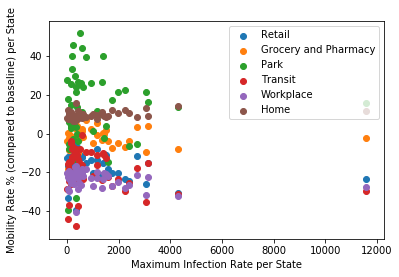

In [125]:
plt.scatter(state_case_rates, retailL, label = 'Retail')
plt.scatter(state_case_rates, grocPharmL, label = 'Grocery and Pharmacy')
plt.scatter(state_case_rates, parkL, label = 'Park')
plt.scatter(state_case_rates, transitL, label = 'Transit')
plt.scatter(state_case_rates, workL, label = 'Workplace')
plt.scatter(state_case_rates, homeL, label = 'Home')

plt.xlabel('Maximum Infection Rate per State')
plt.ylabel('Mobility Rate % (compared to baseline) per State')

plt.legend()

plt.show()